## Healthcare insurance analysis

Hypothesis:
1. Smokers will have higher charges
2. People with higher BMI will have higher charges
3. Charges increase with age
4. Charges will vary by region

Objective: create visualisations that support the project's hypotheses which offer business insights to customer data

Import relevant libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Import the cleaned data into a dataframe

In [13]:
df = pd.read_csv('../datasets/insurance_cleaned.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1337 non-null   int64  
 1   Age            1337 non-null   int64  
 2   Age range      1337 non-null   object 
 3   Sex            1337 non-null   object 
 4   BMI            1337 non-null   float64
 5   BMI Range      1337 non-null   object 
 6   Children       1337 non-null   int64  
 7   Family status  1337 non-null   object 
 8   Smoker         1337 non-null   object 
 9   Region         1337 non-null   object 
 10  Charges        1337 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 115.0+ KB


In [14]:
df.head()

,Unnamed: 0,Age,Age range,Sex,BMI,BMI Range,Children,Family status,Smoker,Region,Charges
0,0,19,18-25,Female,27.9,Overweight,0,No children,Yes,Southwest,16884.92
1,1,18,18-25,Male,33.8,Obese,1,Has children,No,Southeast,1725.55
2,2,28,26-35,Male,33.0,Obese,3,Has children,No,Southeast,4449.46
3,3,33,26-35,Male,22.7,Normal,0,No children,No,Northwest,21984.47
4,4,32,26-35,Male,28.9,Overweight,0,No children,No,Northwest,3866.86


## Visualisation 1: Distribution of key demographic and health metrics

Includes subplots of:
- Age range distribution
- BMI range distribution
- Smoker status distribution
- Region distribution

These 4 bar charts provide a comprehensive overview of the customer base by showing the distribution of customers across key demographic and health-related categories.

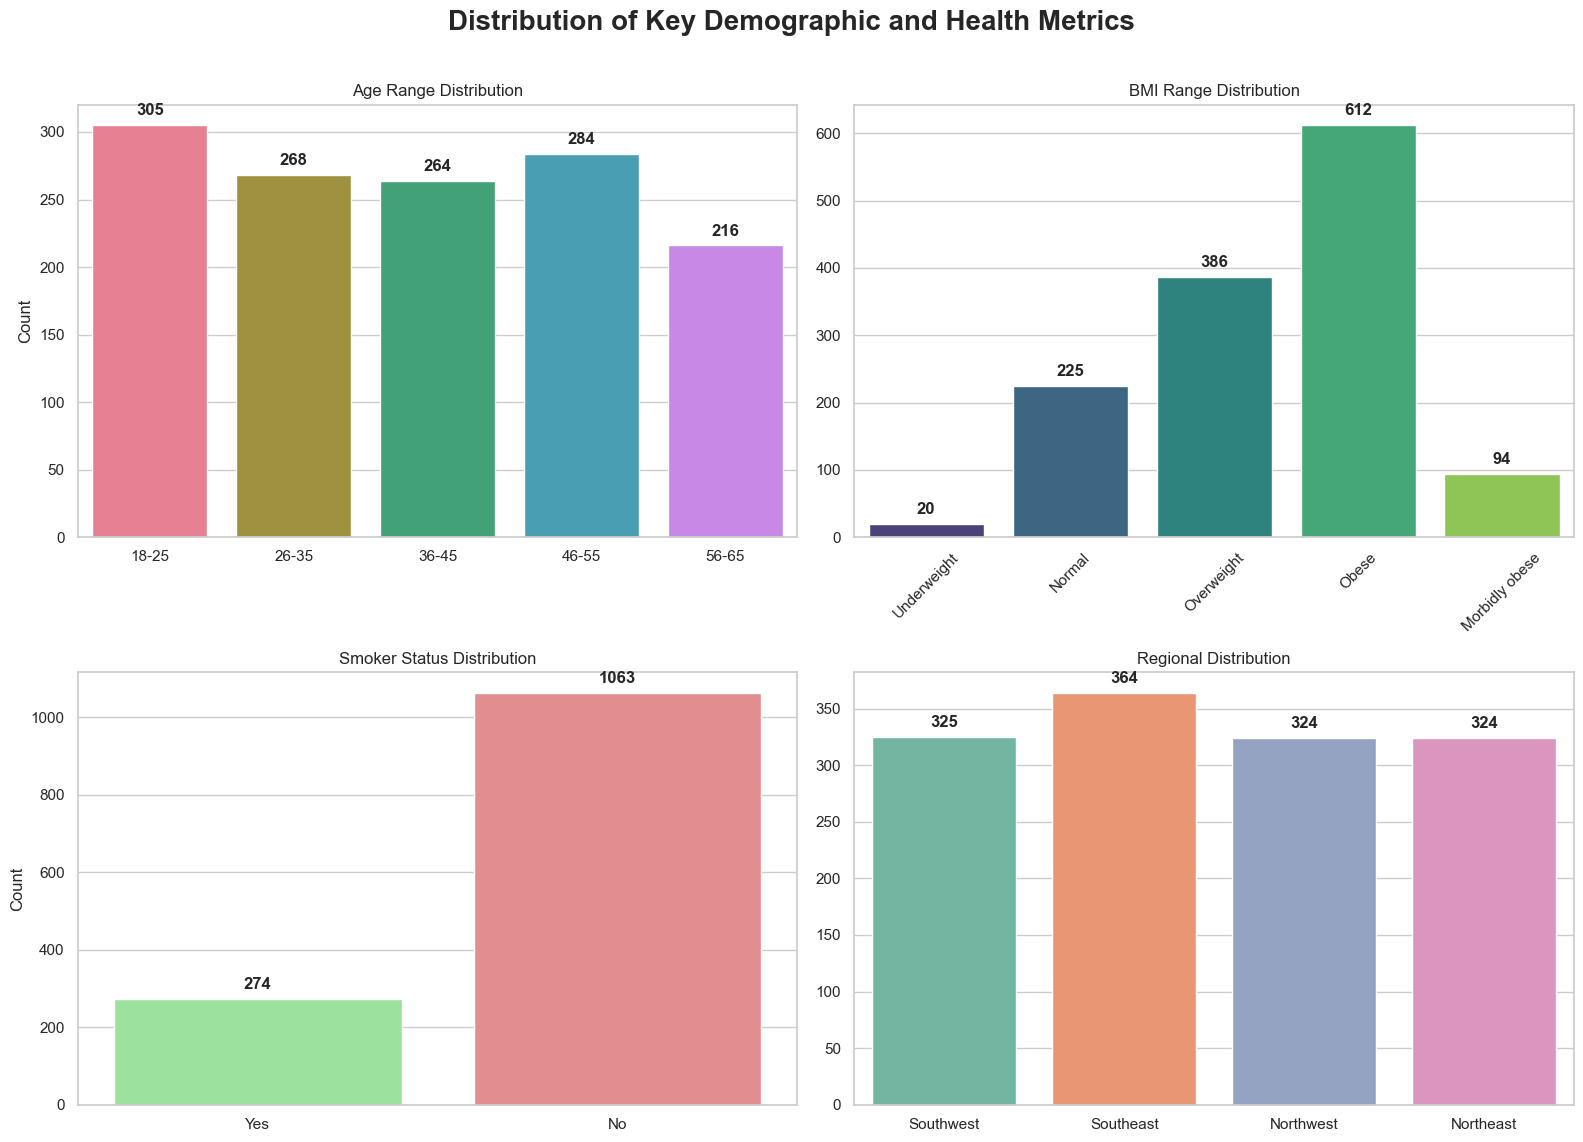

In [15]:
# Create one figure with a 2x2 grid of (4) subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Key Demographic and Health Metrics', fontsize=20, fontweight='bold')

# 1. Age Range Distribution
age_order = ['18-25', '26-35', '36-45', '46-55', '56-65']
sns.countplot(ax=axes[0, 0], data=df, x='Age range', order=age_order, palette='husl')
axes[0, 0].set_title('Age Range Distribution')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Count')

# 2. BMI Range Distribution
bmi_order = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Morbidly obese']
sns.countplot(ax=axes[0, 1], data=df, x='BMI Range', order=bmi_order, palette='viridis')
axes[0, 1].set_title('BMI Range Distribution')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Smoker Status Distribution
sns.countplot(ax=axes[1, 0], data=df, x='Smoker', palette=['lightgreen', 'lightcoral'])
axes[1, 0].set_title('Smoker Status Distribution')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Count')

# 4. Region Distribution
sns.countplot(ax=axes[1, 1], data=df, x='Region', palette='Set2')
axes[1, 1].set_title('Regional Distribution')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')

# Add value labels to all subplots
for ax in axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontweight='bold', xytext=(0, 5), textcoords='offset points')

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjusts boarder margins
plt.show()

### **Observations:**

**Age Range Distribution:** This chart shows the number of customers in each age group. It shows a fairly even distribution across the age ranges, with the youngest group (18-25) being the largest and the oldest group (56-65) being the smallest.

**BMI Range Distribution:** This visualises the distribution of customers based on their Body Mass Index (BMI). A significant portion of the customers are in the 'Overweight' and 'Obese' categories, which is a common trend in many populations.

**Smoker Status Distribution:** This chart compares the number of smokers and non-smokers in the dataset. The data shows that the majority of the customers are non-smokers.

**Regional Distribution:** This shows the geographical distribution of the customers. The dataset includes customers from four regions. This chart reveals that there is a fairly even distrubtion, with the Southeast sligtly more populated.

### **Useful business takeaways:**

- By understanding the demographic makeup of the current customer base, the marketing team can tailor campaigns to attract new customers. For instance, certain age groups may fall behind business targets and allows the business value insights to launch targeted marketing initiatives to reach them.

- With a large percentage of the customer base predominantly in higher BMI ranges, the business can design insurance products and wellness programs that cater to their specific health needs and risks.

- A high prevalence of customers with risk factors like high BMI or smoking indicates a higher overall risk profile for the business. This information is crucial for actuaries to predict future claims and to ensure the company remains financially healthy.

## Visualisation 2: Average charges of key demographic and health metrics
Includes subplots of:
- Age range average charges
- BMI range average charges
- Smoker status average charges
- Region average charges

This set of bar charts provides a powerful tool for understanding the financial impact of different customer characteristics. It moves beyond just looking at the number of customers in each group to examining the average insurance charges for each.

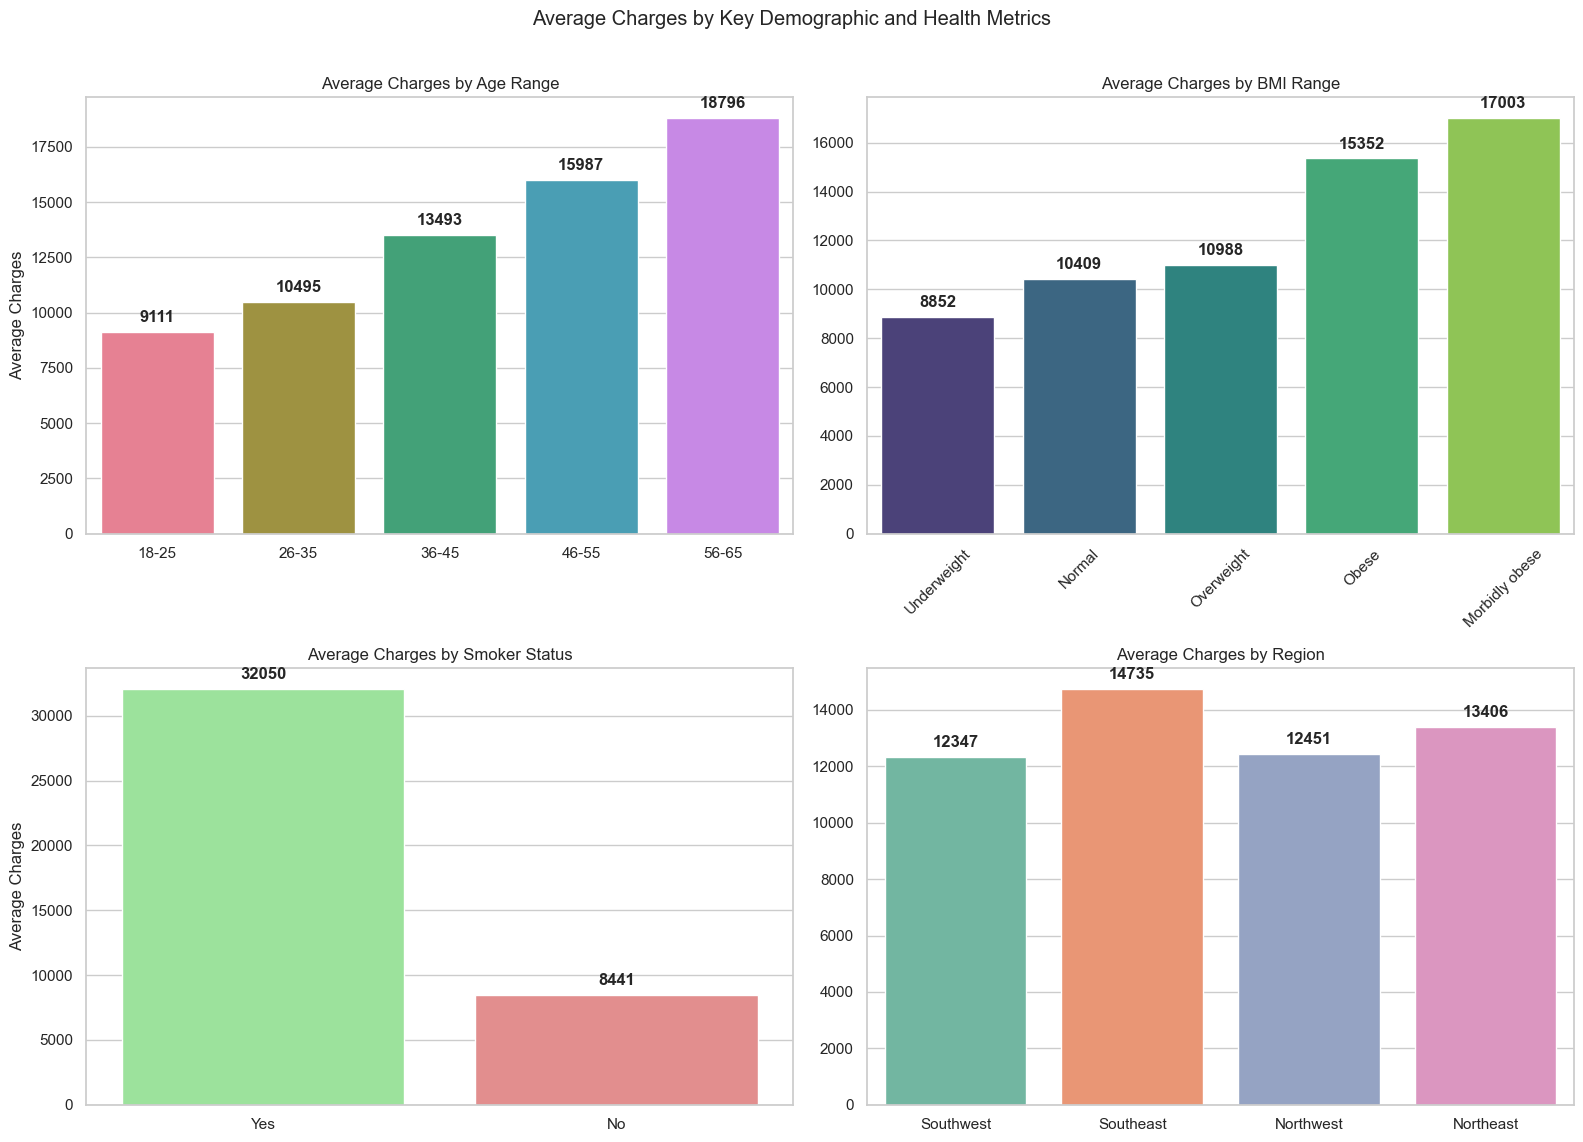

In [16]:
# Create one figure with a 2x2 grid of (4) subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Average Charges by Key Demographic and Health Metrics'),

# 1. Average Charges by Age Range
# Define the order based on the categories
age_order = ['18-25', '26-35', '36-45', '46-55', '56-65']
sns.barplot(ax=axes[0, 0], data=df, x='Age range', y='Charges', estimator=np.mean, errorbar=None, order=age_order, palette='husl')
axes[0, 0].set_title('Average Charges by Age Range')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Average Charges')

# 2. Average Charges by BMI Range
# Define the order for BMI categories
bmi_order = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Morbidly obese']
sns.barplot(ax=axes[0, 1], data=df, x='BMI Range', y='Charges', estimator=np.mean, errorbar=None, order=bmi_order, palette='viridis')
axes[0, 1].set_title('Average Charges by BMI Range')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Average Charges by Smoker Status
sns.barplot(ax=axes[1, 0], data=df, x='Smoker', y='Charges', estimator=np.mean, errorbar=None, palette=['lightgreen', 'lightcoral'])
axes[1, 0].set_title('Average Charges by Smoker Status')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Average Charges')

# 4. Average Charges by Region
sns.barplot(ax=axes[1, 1], data=df, x='Region', y='Charges', estimator=np.mean, errorbar=None, palette='Set2')
axes[1, 1].set_title('Average Charges by Region')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')

# 3. Add value labels to all subplots
for ax in axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontweight='bold', xytext=(0, 5), textcoords='offset points')

# 4. Final layout adjustment and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

**Average Charges by Age Range:** There is a clear trend of increasing average charges with age. Older customers generally have more health issues, leading to higher insurance costs. This accurately concurs with hypothesis 3, where charges increase with age.

**Average Charges by BMI Range:** This chart evently shows that as the BMI range increases from 'Underweight' to 'Morbidly obese', the average insurance charges also increase. This highlights the financial risk associated with higher BMI and proves this report's second hypothesis: people with higher BMI will have higher charges.

**Average Charges by Smoker Status:** This is the most dramatic comparisons in the dataset. Smokers have significantly higher average insurance charges than non-smokers: 32,050 compared to 8,441. The dataset strongly supports this report's hypothesis 1: smokers will have higher charges.

**Average Charges by Region:** This chart reveals some regional differences in charges, with the Southeast reporting higher average charges. This could be due to variations in healthcare costs, lifestyle factors, or lower business competition in the Southeast regions (the dataset does not reveal these insights and are speculative with the given information). This aligns  with hypothesis 4, where charges will vary by region.

### **Useful business takeaways:**

- These visualisations provide clear evidence to support different pricing strategies. They can be used to justify higher premiums for higher-risk groups.

- By understanding which segments have the highest charges, the business can analyse their profitability. This might lead to strategies to manage risk in these segments or to adjust pricing to ensure profitability.

- With regional charge fluxuations, the business might investigate the reasons behind it. This could lead to negotiating better rates with healthcare providers in that region or promoting wellness programs to reduce health risks.

## Visualistion 3: Box plot of charges by smoker status.


A box plot is a great tool for comparing the charges between smokers and non-smokers because it provides more detail than a simple bar chart of averages. 

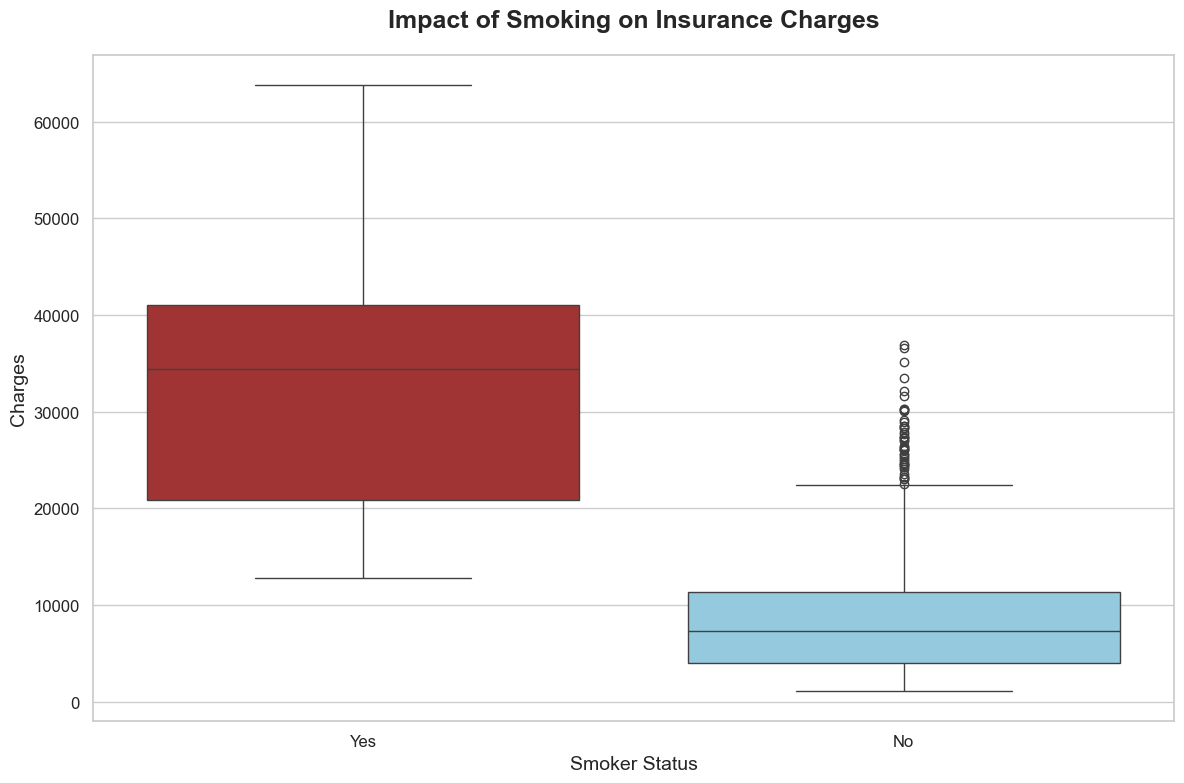

In [17]:
# Styling with specific color palette
sns.set_theme(style="whitegrid")
smoker_palette = {"Yes": "firebrick", "No": "skyblue"}

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Smoker', y='Charges', data=df, palette=smoker_palette)

# Add titles and labels
plt.title('Impact of Smoking on Insurance Charges', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Smoker Status', fontsize=14)
plt.ylabel('Charges', fontsize=14)

# Increase tick label size for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot the graph
plt.tight_layout()
plt.show()

The box plot shows:

**Median Charges:** The line inside each box represents the median charge for that group. The median charge for smokers is substantially higher than for non-smokers.

**Spread of Charges:** The height of the boxes (the interquartile range) will show the spread of charges for the middle 50% of customers in each group. It shows the charges for smokers are not only higher on average but also more spread out, indicating greater variability and unpredictability in their health costs.

**Outliers:** The points outside the "whiskers" of the box plot represent outliers. Interestingly more high-end outliers can be seen in the non-smoker group, representing secondary considerations beyond smokers vs non-smokers in the charge analysis.

This visualisation again confirms hypthesis 1 with clear indication that smokers incur higher charges.

### **Useful business takeaways:**

- This visualisation is a powerful tool for communicating risk. It can be used internally to educate underwriters and sales teams about the financial impact of smoking. A simpler variation of this graph can also be used in customer-facing materials to illustrate the financial benefits of quitting smoking.

- High-end outliers in the non-smoking group suggest that a more sophisticated pricing model might be needed for this group, one that takes into account other factors to better predict their individual risk.

- The clear financial impact of smoking shown in this plot provides a strong business case for investing in smoking cessation programs for customers.

## Visualisation 4: Age vs Charges scatter plot (with smoker legend)

This scatter plot is a great way to visualise the relationship between three variables: age, charges, and smoking status.

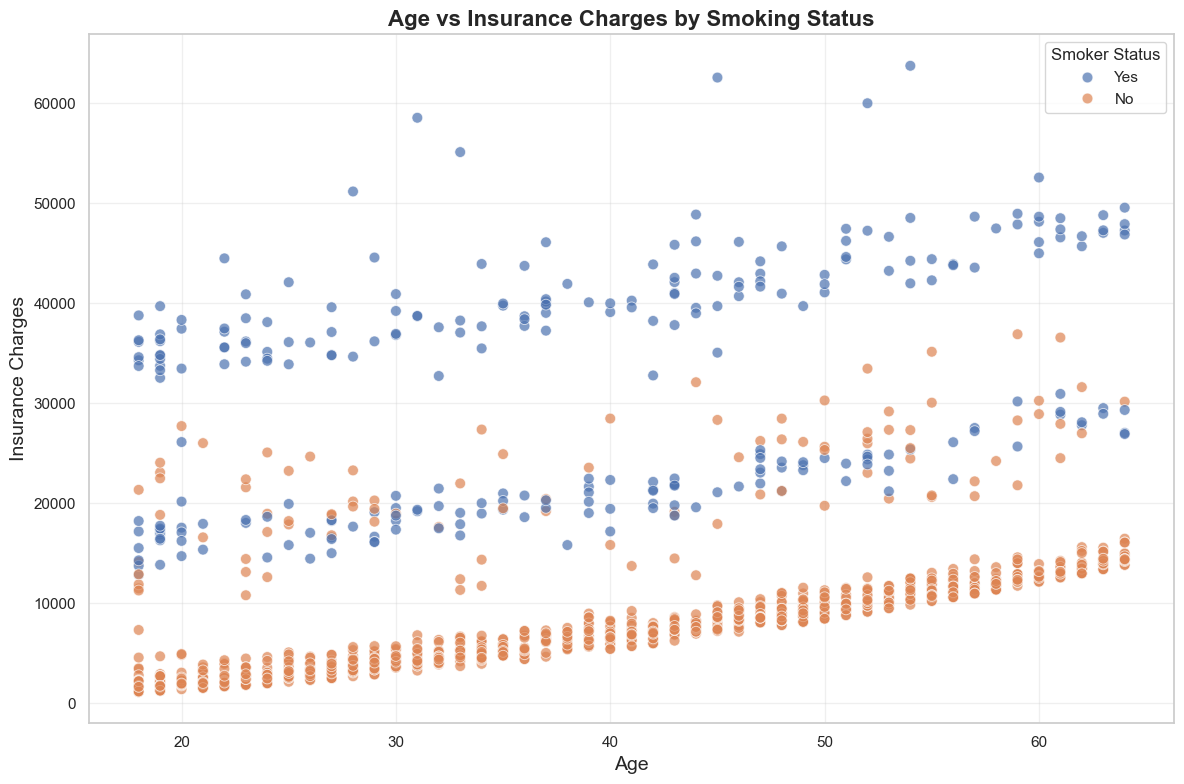

In [18]:
plt.figure(figsize=(12, 8))
# Create scatter plot with colors
sns.scatterplot(data=df, x='Age', y='Charges', hue='Smoker', alpha=0.7, s=60)
# Add title and labels
plt.title('Age vs Insurance Charges by Smoking Status', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.legend(title='Smoker Status', title_fontsize=12, fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### **Observations:**

From this plot, you should be able to observe:

**Positive Correlation between Age and Charges:** For both smokers and non-smokers, it is evident that as age increases, the insurance charges tend to increase as well.

**Clear Separation of Smokers and Non-Smokers:** The plot shows two distinct clusters of points. The points for smokers are generally higher on the 'Charges' axis than the points for non-smokers of the same age.


### **Useful business takeaways:**

- This visualisation can help actuaries to build more accurate pricing models. It clearly shows that 'Age' and 'Smoker' are not just independent factors; they interact. A good pricing model should capture this interaction effect.

- The plot allows for the easy identification of high-risk customer segments, such as older smokers, who have the highest charges. The business can then decide on strategies for managing the risk associated with these segments.

## Visualisation 5: BMI vs Charges scatter plot (with smoker legend)

The scatter plot reveals several key insights by plotting each customer as a point based on their BMI and insurance charge, and then color-coding that point by their smoking status.

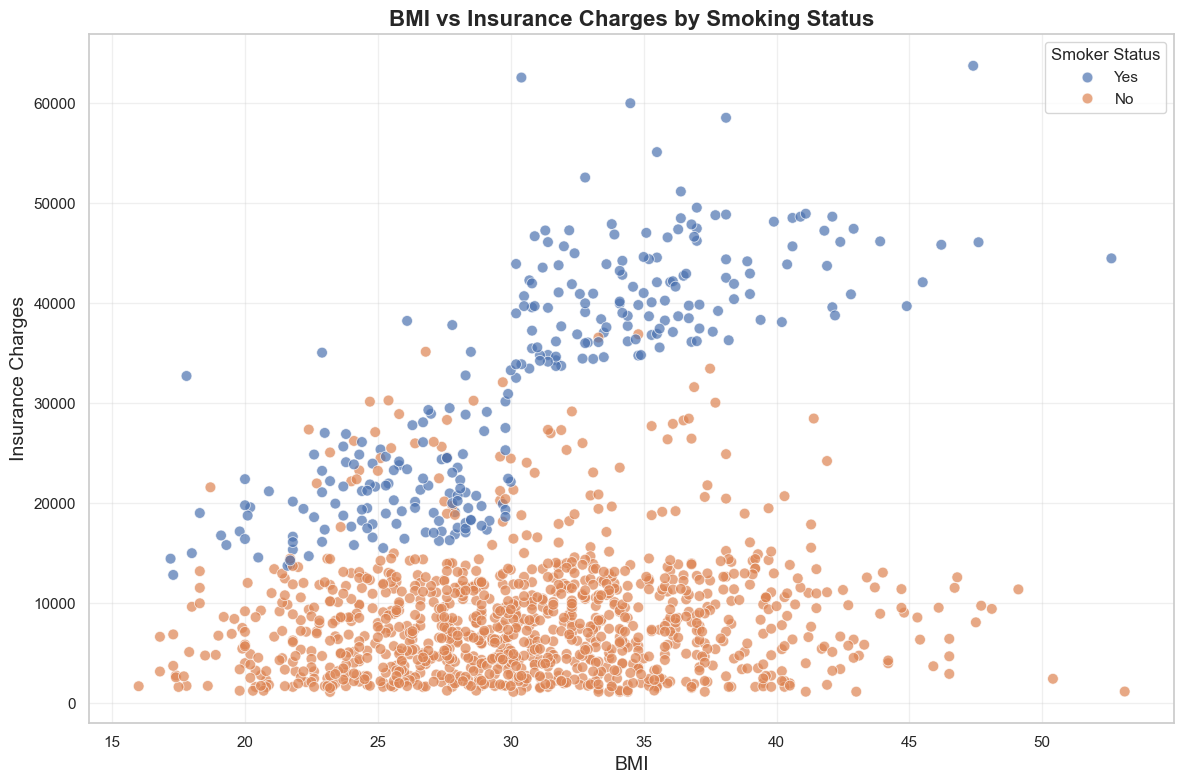

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='BMI', y='Charges', hue='Smoker', alpha=0.7, s=60)
plt.title('BMI vs Insurance Charges by Smoking Status', fontsize=16, fontweight='bold')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.legend(title='Smoker Status', title_fontsize=12, fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### **Observations:**

**Non-Smokers (Orange Dots):** The vast majority of customers fall into this category. Their insurance charges are clustered at the lower end of the scale, generally below 15,000. While there is a slight upward trend (as BMI increases, the maximum charge tends to rise), the relationship is weak. This indicates that for non-smokers, BMI is not the primary driver of high insurance costs, and most individuals in this group have relatively low and predictable charges.

**Smokers (Blue Dots):** This group shows a dramatically different and more complex pattern. The charges for smokers are consistently higher than for non-smokers across all BMI levels. Crucially, the plot reveals two distinct segments within the smoker population:

- **Smokers with BMI below 30:** These individuals have higher charges than their non-smoking counterparts, typically ranging from approximately 15,000 to 25,000. However, their costs do not show a strong correlation with their BMI.

- **Smokers with BMI above 30:** A clear tipping point appears around a BMI of 30. For smokers in the 'Obese' and 'Morbidly obese' categories, insurance charges increase steeply and significantly with BMI. Charges for this group start at a higher baseline (around 30,000) and can skyrocket to over 60,000.

**The Interaction Effect:** The most important insight from this graph is the compounding effect of smoking and high BMI. While being a smoker or having a high BMI are individual risk factors, their combination creates a much higher risk profile than the sum of their individual effects. A non-smoker with a BMI of 35 might have charges around 10,000, whereas a smoker with the same BMI could have charges exceeding 40,000.

### **Useful business takeaways:**

- This visualisation provides a strong argument for creating targeted wellness programs. For example, the business could offer programs that combine weight management support with smoking cessation resources for customers who fall into the high-risk quadrant of high BMI and smoking.

- The insights from this plot could be used to design personalised insurance products. For instance, customers who successfully reduce their BMI or quit smoking could be rewarded with lower premiums, and this plot helps to quantify the potential savings.

## Visualisation 6: Interactive BMI vs Charges scatter plot (with smoker legend)

In [20]:
# Create an interactive scatter plot
# The 'size' parameter is used to represent Age

fig = px.scatter(
    df,
    x='BMI',
    y='Charges',
    color='Smoker',
    size='Age',  # Represent age by the size of the marker
    hover_data=['Age', 'Sex', 'Region', 'Children'],
    title='Interactive Plot: BMI vs. Charges (Sized by Age)'
)

fig.show(renderer="browser")